In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm

# Maximum likelihood method
## 1. Likelihood function and log-likelihood function
For a sample with size n, i.e., $X=\left\{ X_1, X_2,...,X_n \right\}$, the likelihood funtion is:
$$
L(X, \theta)=\prod_{k=1}^{n} f\left(X_{k}, \theta\right)
$$
where $\theta$ is the parameter to be estimated, and $f(\cdot)$ is a given probability mass/density function.

The maximum likelihood method, as the name implies, is a method to determine the most appropriate distribution parameter to maximize the likelihood function.
$$
\hat \theta = \text{argmax}_\theta L(X, \theta)
$$

For computation convenience, we can take logarithm to get the log-likelihood function:
$$
\ell(X, \theta) = \log L(X, \theta)=\log \prod_{k=1}^{n} f\left(X_{k}, \theta\right)=\sum_{k=1}^{n} \log f\left(X_{k}, \theta\right)
$$

It is worth mentioning that, taking logarithm does not affect our estimation as the parameter maximizing the log-likelihood function also maximize the original likelihood fucntion.
$$
\hat \theta = \text{argmax}_\theta \ell (X, \theta)
$$

### 1.1 An illustrative example (from Likelihood function.ipynb)
In winter, the probability p of students getting cold is probably 0.05 or 0.06 or 0.07..., but we do not exactly know. Therefore, we need to firstly sample some students to obtain the statistical information. Let's sample 100 students from a school, among which 6 get cold. What are the likelihood fucntion and log-likelihood fucntion?

| Sample size | # of students getting cold |
| --- | --- |
| 100 | 6   |



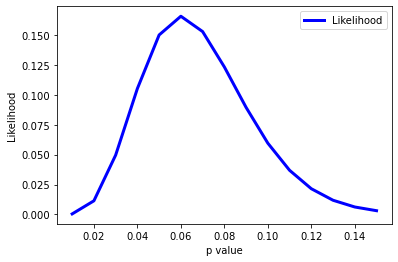

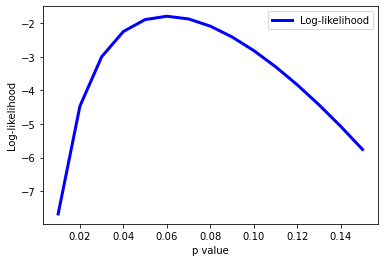

In [22]:
student_num = 100
cold_num = 6
p = np.linspace(0.01, 0.15, 15)
likelihood = binom.pmf(cold_num, student_num, p)
log_likelihood = np.log(likelihood)

# plot the likelihood function
fig, ax = plt.subplots(1, 1)
ax.plot(p, likelihood, 'b-', lw=3, alpha=1, label='Likelihood')
plt.xlabel('p value')
plt.ylabel('Likelihood')
plt.legend()

# plot the log-likelihood function
fig, ax = plt.subplots(1, 1)
ax.plot(p, log_likelihood, 'b-', lw=3, alpha=1, label='Log-likelihood')
plt.xlabel('p value')
plt.ylabel('Log-likelihood')
plt.legend()

## 2. Score and observed information
### 2.1 Score
To find the maimum likelihood equation, we need to differentiate the log-likelihood function and set it equals to 0, i.e.,
$$
\frac{d}{d \theta} \ell (X, \theta)=0
$$
which is called the score equation.

### 2.2 Observed information
The negative second derivative of likelihood function is called the observed information.
$$
I_o(X, \theta)=-\frac{d^{2}}{d \theta^{2}} \ell (X, \theta) \geq 0
$$
- The second derivative must be negative (maximization problem).
- The observed information must be positive.

The observed information reflects our confidence in the maximum likelihood estimation. It is not hard to imagine that, if the observed information closes to zero, it means that the maximum point is relatively flat and other parameter options may also be likely to be the "true" parameter. If the observed information is a large positive value, it means the likelihood function has a obvious peak point and other parameter options are less likely to be the "true" parameter.

## 3. Statistical properties of MLE
- The MLE is **NOT** an unbiased estimator neccessarily.
- The MLE is **asymptotically** unbiased and consistent.
- The asymptotic distribution of maximum likelihood estimator is normal (good for confidence intervals!)
$$
\widehat{\Theta} \sim N\left(\theta, \frac{1}{E\left[ I_o(X, \hat{\theta}) \right]} \right)
$$
where $E\left[ I_o(X, \hat{\theta}) \right]$ is the expected information.
- Transformation invariance: if MLE for $\theta$ is $\hat \theta$, then the MLE for $g(\theta)$ is $g(\hat \theta)$. If the standard error for $\hat \theta$ is $se(\hat \theta)$, then the standard error for the transformation is
$$
\operatorname{se}[g(\hat{\theta})] \approx g^{\prime}(\hat{\theta}) \operatorname{se}(\hat{\theta})
$$
It is basically the error propagation in calculus.

### An example: pregnancy success from artificial insemination
#### Problem setting
n=number of successful couples;\
y=total pregnancy attempts by all couples;\
$\theta$=probability of individual success.

Find the MLE where n=20, y=100 and calculate a 95% confidence interval.

#### Solution
The likelihood function is:
$$
L(\theta)=\theta^{n}(1-\theta)^{y-n}
$$

The log-likelihood function is:
$$
\ell(\theta)=n \log \theta+(y-n) \log (1-\theta)
$$

The first derivative, i.e., score, is:
$$
\frac{d}{d \theta} \ell(\theta)=\frac{n}{\theta}-\frac{y-n}{1-\theta}=0
\Rightarrow \hat \theta = \frac{n}{y} = \frac{20}{100} = 0.2
$$

The observe information is:
$$
I_o(\theta ; y)=-\frac{d^{2}}{d \theta^{2}} \ell(\theta)=-\left[-\frac{n}{\theta^{2}}-\frac{y-n}{(1-\theta)^{2}}\right]
$$

The expected information is (we can also take the expectation of n):
$$
I(\theta)=E\left[I_o(\theta ; y)\right]=\frac{n}{\theta^{2}}+\frac{E(Y)-n}{(1-\theta)^{2}}
$$
where 
$$
E(Y)=\frac{n}{\theta}
$$

Therefore,
$$
I(\theta)=\frac{n}{\left(\theta^{2}\right)(1-\theta)}
$$

Finally, plug in the sample information, the 95% confidence level is:
$$
\frac{n}{y} \pm 1.96 \sqrt{\frac{\hat{\theta}^{2}(1-\hat{\theta})}{n}} = 0.2 \pm 1.96 \sqrt{\frac{0.2^{2}(0.8)}{20}}=[0.1216,0.2784]
$$

## 4. Multiple parameters
The multiple parameters MLE is the generalization of the single parameter MLE.

For multiple parameters, MLE asymptotically converges to the multivariate Normal distribution:
$$
\widehat{\Theta} \sim N_p\left(\theta, I(X, \hat{\theta})^{-1}\right)
$$
where p is the number of estimated parameters. 
The score is
$$
\theta=\left[\begin{array}{c}
\theta_{1} \\
\vdots \\
\theta_{p}
\end{array}\right]
$$
The MLE $\hat{\theta}$ is the solution of the following equation system:
$$
\begin{gathered}
\partial \ell \left(\theta_{1}, \ldots, \theta_{p}\right) / \partial \theta_{1}=0 \\
\vdots \\
\partial \ell \left(\theta_{1}, \ldots, \theta_{p}\right) / \partial \theta_{p}=0
\end{gathered}
$$

The observed information is
$$
I(X, \hat{\theta})=\left[\begin{array}{ccc}
I_{11} & \cdots & I_{1 p} \\
\vdots & \ddots & \vdots \\
I_{p 1} & \cdots & I_{p p}
\end{array}\right]
$$
where
$$
I_{i j}=- \frac{\partial^{2}}{\partial \theta_{i} \partial \theta_{j}} \ell \left(\theta_{1}, \ldots, \theta_{p}\right)
$$


### An example: systolic blood pressure (SBP) in pregnancy
A sample of 5 pregnant women have their SBP taken, which is considered to be normally distributed.

| Person | 1   | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| SBP | 135   | 123 | 120 | 102 | 110 |

What are the most likely values of $\mu$ and $\sigma$?

### Solution:
Here the distribution is given as a normal distribution with PDF:
$$
f(x; \mu, \sigma^2)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}
$$

The likelihood function is:
$$
L\left(X ; \mu, \sigma^{2} \right)=\prod_{i=1}^{5} f_{i}\left(x_{i} ; \mu, \sigma^{2}\right) =\left(\frac{1}{2 \pi \sigma^{2}}\right)^{\frac{n}{2}} \exp \left\{-\sum_{i=1}^{n} \frac{\left(x_{i}-\mu\right)^{2}}{2 \sigma^{2}}\right\}
$$

The log-likelihood function is:
$$
\ell = \log L\left(X ; \mu, \sigma^{2}\right)=-\left(\frac{n}{2}\right) \ln (2 \pi)-\left(\frac{n}{2}\right) \ln \left(\sigma^{2}\right)-\frac{1}{2 \sigma^{2}}\left(\Sigma x^{2}-2 \mu \Sigma x+n \mu^{2}\right)
$$

Let the score with respect to $\mu$ to be zero:
$$
\frac{\partial \ell}{\partial \mu}=\frac{2(\Sigma x-n \mu)}{2 \sigma^{2}}=\frac{(\Sigma x-n \mu)}{\sigma^{2}}=0
\Rightarrow \hat \mu = \frac{\sum x}{n}
$$
Plug in the values:
$$
\hat \mu = \frac{\sum x}{n} = \frac{135 + 123 + 120 + 102 + 110}{5} = 118
$$

Let the score with respect to variance to be zero  (of course, we can also take the derivative with respect to $\sigma$):
$$
\frac{\partial \ell}{\partial \sigma^{2}}=-\frac{n}{2 \sigma^{2}}+\frac{1}{2\left(\sigma^{2}\right)^{2}}\left(\Sigma x^{2}-2 \mu \Sigma x+n \mu^{2}\right)=0
\Rightarrow \hat \sigma^2 = \frac{1}{n} \left(\sum x^2 - 2\hat \mu \sum x + n \hat \mu^2 \right)
$$

Do some algebra manipulation to replace $\hat \mu$ in the second equation:
$$
\begin{aligned}
\hat{\sigma}^{2} &=\left(\frac{1}{n}\right)\left(\Sigma x^{2}-2 \hat{\mu} \Sigma x+n \hat{\mu}^{2}\right) \\
&=\frac{\Sigma x^{2}}{n}-\frac{2 \Sigma x \Sigma x}{n^{2}}+\frac{(\Sigma x)^{2}}{n^{2}} \\
&=\frac{\Sigma x^{2}}{n}-\left(\frac{\Sigma x}{n}\right)^{2} \\
&=\frac{\Sigma(x-\hat{\mu})^{2}}{n} (alternatively)
\end{aligned}
$$

Plug in the values:
$$
\hat{\sigma}^{2} = \frac{\Sigma(x-\hat{\mu})^{2}}{n} = \frac{(135 - 118)^2 + (123 - 118)^2 + (120 - 118)^2 + (102 - 118)^2 + (110-118)^2}{5} = 127.6
$$

From the last equation, we can see that MLE is not necessarily an unbiased estimation, as an unbiased estimation should specify the denominator as n-1, i.e.,
$$
\hat{\sigma}^{2} = \frac{\Sigma(x-\hat{\mu})^{2}}{n-1} (Unbiased)
$$

In [23]:
sample = [135, 123, 120, 102, 110]

# Maximum likelihood estimates
print('mean', sum(sample)/5)
print('variance', np.var(sample))
print('Standard deviation', np.sqrt(np.var(sample)))

mean 118.0
variance 127.6
Standard deviation 11.29601699715435


## 5. Other estimation method
- Oridnary least square.
- Method of moments.

The main difference between MLE and the above two methods is that MLE uses the distribution of the random variable.

## 6. Reference
zedstatistics: https://www.youtube.com/watch?v=7kLHJ-F33GI&t=10s